In [2]:
%matplotlib inline

In [3]:
import matplotlib.pylab as plt
import csv
import numpy as np
import pandas as pd
import os
import seaborn as sn
sn.set_context('talk')

In [4]:
60000/3700

16.216216216216218

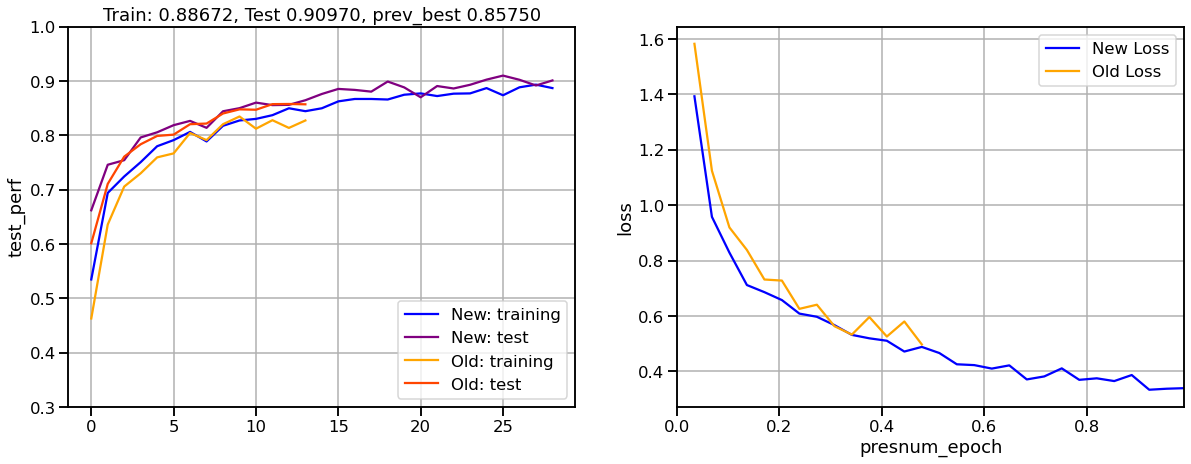

In [93]:
dat = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_57.csv'))
dat.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat['presnum_epoch'] = ((dat.presnum*64) + maxpres*dat.epoch)/maxpres

dat2 = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_55.csv'))
dat2.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat2['presnum_epoch'] = ((dat.presnum*64) + maxpres*dat.epoch)/maxpres

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dat, x=dat.index, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dat, x=dat.index, y='test_perf', ax=ax, 
            color='purple')

sn.lineplot(data=dat2, x=dat2.index, y='perf', ax=ax,
            color='orange', dashes=[(2,2)])
sn.lineplot(data=dat2, x=dat2.index, y='test_perf', ax=ax,
            color='orangered', )
ax.legend(["New: training", "New: test", 
           "Old: training", "Old: test"])


ax.grid(True)
ax.set_title("Train: {:.5f}, Test {:.5f}, prev_best {:.5f}".format(dat.perf.iloc[-1], 
                                                                   dat.test_perf.max(), 
                                                                   dat2[dat2.presnum_epoch <= 
                                                                        dat.presnum_epoch.max()].test_perf.max()))
ax.set_ylim(.3, 1.0)

ax = fig.add_subplot(1,2,2)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='loss', ax=ax, 
            color='blue')
sn.lineplot(data=dat2, x=dat2.presnum_epoch, y='loss', ax=ax,
            color='orange')
ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,2)
ax.grid(True)


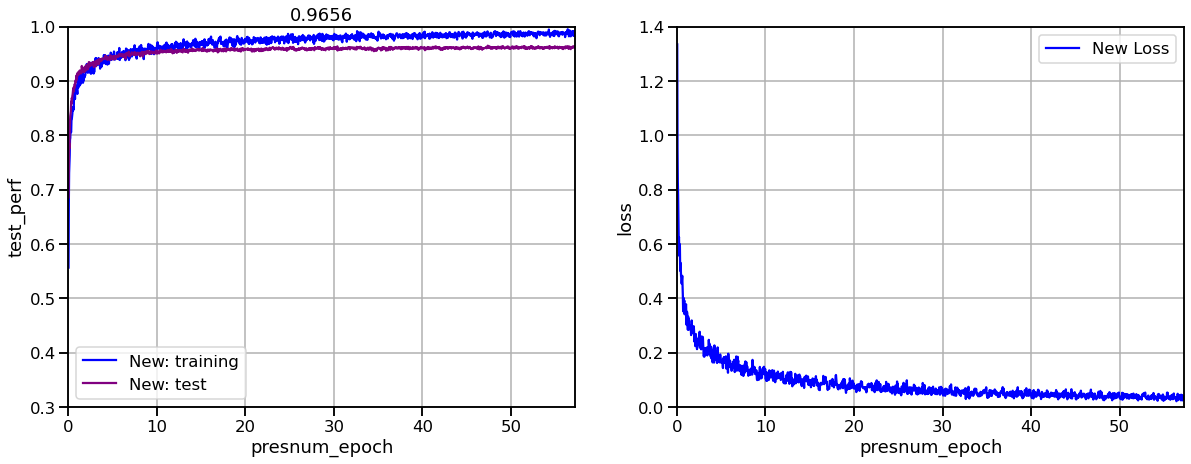

In [316]:
dat = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_50.csv'))
dat.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat['presnum_epoch'] = ((dat.presnum*20) + maxpres*dat.epoch)/maxpres

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dat, x=dat.presnum_epoch, y='test_perf', ax=ax, 
            color='purple')

ax.legend(["New: training", "New: test", 
           "Old: training", "Old: test"])
ax.set_title(dat.test_perf.max())

ax.grid(True)

ax.set_ylim(.3, 1.0)
ax.set_xlim(0,mark)#)

ax = fig.add_subplot(1,2,2)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='loss', ax=ax, 
            color='blue')

ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,mark)#)
ax.set_ylim(0,1.4)#)

#ax.set_xlim(0,2)
ax.grid(True)


In [317]:
dat[dat.presnum_epoch < mark].test_perf.max()

0.9648

110.512


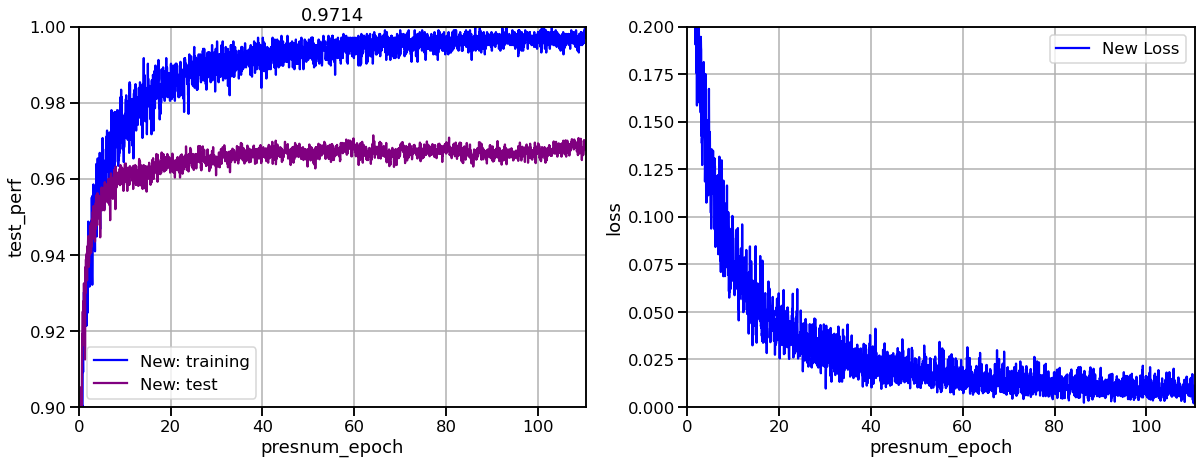

In [430]:
dat = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_69.csv'))
dat.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat['presnum_epoch'] = ((dat.presnum*64) + maxpres*dat.epoch)/maxpres

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dat, x=dat.presnum_epoch, y='test_perf', ax=ax, 
            color='purple')

ax.legend(["New: training", "New: test", 
           "Old: training", "Old: test"])
ax.set_title(dat.test_perf.max())

ax.grid(True)

ax.set_ylim(.9, 1.0)
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)

ax = fig.add_subplot(1,2,2)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='loss', ax=ax, 
            color='blue')

ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)
ax.set_ylim(0,.2)#)

ax.grid(True)
print(dat.presnum_epoch.max())
mark = dat.presnum_epoch.max()

In [416]:
dat = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_50.csv'))
dat.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat['presnum_epoch'] = ((dat.presnum*20) + maxpres*dat.epoch)/maxpres
dat[dat.presnum_epoch < mark].test_perf.max()


0.9656

In [ ]:
'smnist_deepsith_2.csv'

96.7168


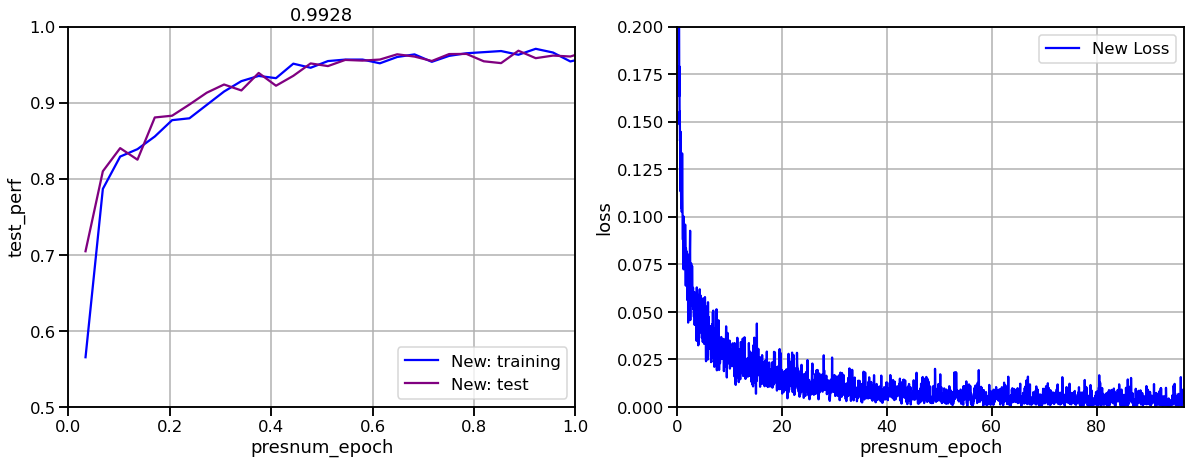

In [523]:
dato = pd.read_csv(os.path.join('perf', 'smnist_deepsith_2.csv'))
dato.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dato['presnum_epoch'] = ((dato.presnum*64) + maxpres*dato.epoch)/maxpres

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dato, x=dato.presnum_epoch, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dato, x=dato.presnum_epoch, y='test_perf', ax=ax, 
            color='purple')

ax.legend(["New: training", "New: test", 
           "Old: training", "Old: test"])
ax.set_title(dato.test_perf.max())
ax.axvline(dato.presnum_epoch[dato.test_perf.argmax()])
ax.grid(True)

ax.set_ylim(.5, 1.0)
ax.set_xlim(0,1)#dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)

ax = fig.add_subplot(1,2,2)
sn.lineplot(data=dato, x=dato.presnum_epoch, y='loss', ax=ax, 
            color='blue')

ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,dato.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)
ax.set_ylim(0,.2)#)

ax.grid(True)
print(dato.presnum_epoch.max())
mark = dato.presnum_epoch.max()

17.785066666666665


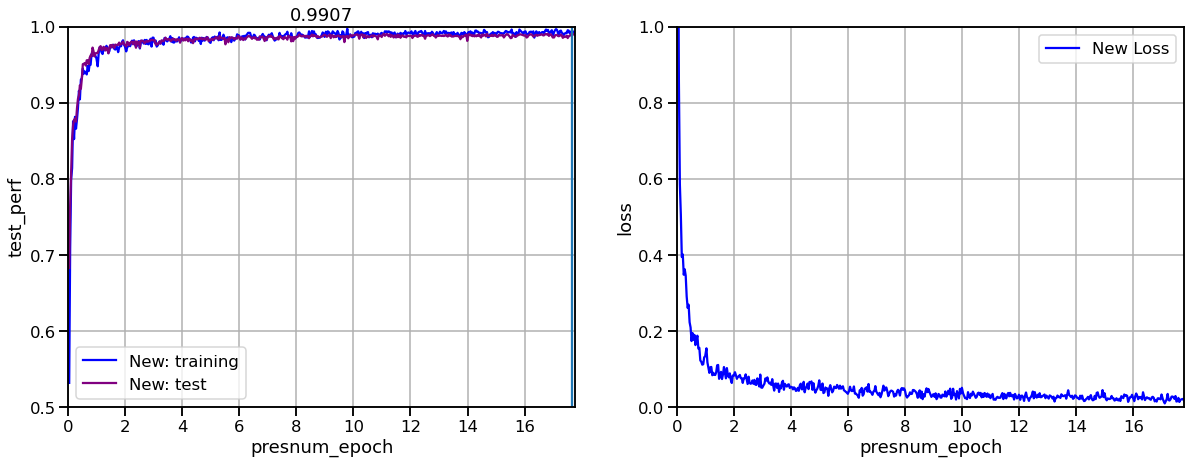

In [574]:
dat = pd.read_csv(os.path.join('perf', 'smnist_deepsith_5.csv'))
dat.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat['presnum_epoch'] = ((dat.presnum*64) + maxpres*dat.epoch)/maxpres

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dat, x=dat.presnum_epoch, y='test_perf', ax=ax, 
            color='purple')

ax.legend(["New: training", "New: test", 
           "Old: training", "Old: test"])
ax.set_title(dat.test_perf.max())
ax.axvline(dat.presnum_epoch[dat.test_perf.argmax()])
ax.grid(True)

ax.set_ylim(.5, 1.0)
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)

ax = fig.add_subplot(1,2,2)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='loss', ax=ax, 
            color='blue')

ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)
ax.set_ylim(0,1)#)

ax.grid(True)
print(dat.presnum_epoch.max())
mark = dat.presnum_epoch.max()

In [573]:
dato[dato.presnum_epoch <= mark].test_perf.max()

0.991